# 1- Exploration générale des données
https://www.donneesquebec.ca/recherche/dataset/statistiques-du-registre-foncier-du-quebec-sur-le-marche-immobilier/resource/c05ac154-4745-46d0-a158-e84655f66084


In [3]:
import pandas as pd
from plotnine import *
import numpy as np

In [4]:
data_prix_vente = pd.read_csv("data/donn_prix_vente_reqst.csv")
data_prix_vente["DT_DEBUT_MOIS"] = pd.to_datetime(data_prix_vente["DT_DEBUT_MOIS"])
print(data_prix_vente.head())
data_transfert_propriete = pd.read_csv("data/donn_transf_prop_reqst.csv")
print(data_transfert_propriete.head())
date_minimale = np.min(data_transfert_propriete.DT_DEBUT_MOIS)

  DT_DEBUT_MOIS  ID_REGN_ADMIN  CD_PLAGE_PRIX  CD_NATR_ACTE_JURDQ  NB_REQST
0    2020-01-01              1              1                   1       191
1    2020-01-01              1              2                   1        14
2    2020-01-01              1              3                   1         7
3    2020-01-01              2              1                   1       241
4    2020-01-01              2              2                   1        44
  DT_DEBUT_MOIS  ID_REGN_ADMIN  CD_NATR_ACTE_JURDQ  NB_REQST
0    2020-01-01              1                   1       212
1    2020-01-01              1                   5        20
2    2020-01-01              1                   6         5
3    2020-01-01              1                 100        34
4    2020-01-01              1                 117         2


In [5]:
liste_code_transfert =  pd.read_csv("data/list_natr_transf_prop.csv")
liste_code_transfert = liste_code_transfert.sort_values(by=["CD_NATR_ACTE_JURDQ"])
#liste_code_transfert = liste_code_transfert[(liste_code_transfert["DT_FIN_EFECT"] > date_minimale) | (liste_code_transfert["DT_FIN_EFECT"].isna())]
#print(liste_code_transfert.head())
print(str(liste_code_transfert))

liste_regions = pd.read_csv("data/code_regions.csv")

print(liste_regions)


    CD_NATR_ACTE_JURDQ                                 NM_NATR_ACTE_JURDQ  \
44                   1                                              Vente   
17                   5                                           Donation   
50                   6                                            Échange   
10                  15                    Bail immobilier excédant 40 ans   
0                   35                                 Acte de concession   
1                   40                       Apport à société - propriété   
3                   58                               Avis de confirmation   
4                   71            Avis de renonciation au droit exproprié   
5                   78                     Avis de transfert de propriété   
6                   79    Avis de transfert de propriété- Comm. Scolaires   
11                  87                                       Bail à rente   
12                  91                                 Billet de location   

In [6]:
plages_prix = dict()
plages_prix[1] = "Moins de 250 000$"
plages_prix[2] = "De 250 000$ à 500 000$"
plages_prix[3] = "Plus de 500 000$"

## Ventes dans le temps, par plage de prix



In [7]:
# Fusion avec le nom de la région
data_prix_vente_regions = data_prix_vente.join(other=liste_regions.set_index("ID_REGN_ADMIN"),
                                               on = "ID_REGN_ADMIN", how="left", )
print(data_prix_vente_regions.head())
print(data_prix_vente_regions.dtypes)

  DT_DEBUT_MOIS  ID_REGN_ADMIN  CD_PLAGE_PRIX  CD_NATR_ACTE_JURDQ  NB_REQST  \
0    2020-01-01              1              1                   1       191   
1    2020-01-01              1              2                   1        14   
2    2020-01-01              1              3                   1         7   
3    2020-01-01              2              1                   1       241   
4    2020-01-01              2              2                   1        44   

            NOM_REGN_ADMIN  
0      "Bas-Saint-Laurent"  
1      "Bas-Saint-Laurent"  
2      "Bas-Saint-Laurent"  
3   "Saguenay-Lac-St-Jean"  
4   "Saguenay-Lac-St-Jean"  
DT_DEBUT_MOIS         datetime64[ns]
ID_REGN_ADMIN                  int64
CD_PLAGE_PRIX                  int64
CD_NATR_ACTE_JURDQ             int64
NB_REQST                       int64
 NOM_REGN_ADMIN               object
dtype: object


c:\Users\koolc\OneDrive\Documents\Quebec-Explorer-registre-foncier\.venv\Lib\site-packages\mizani\breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


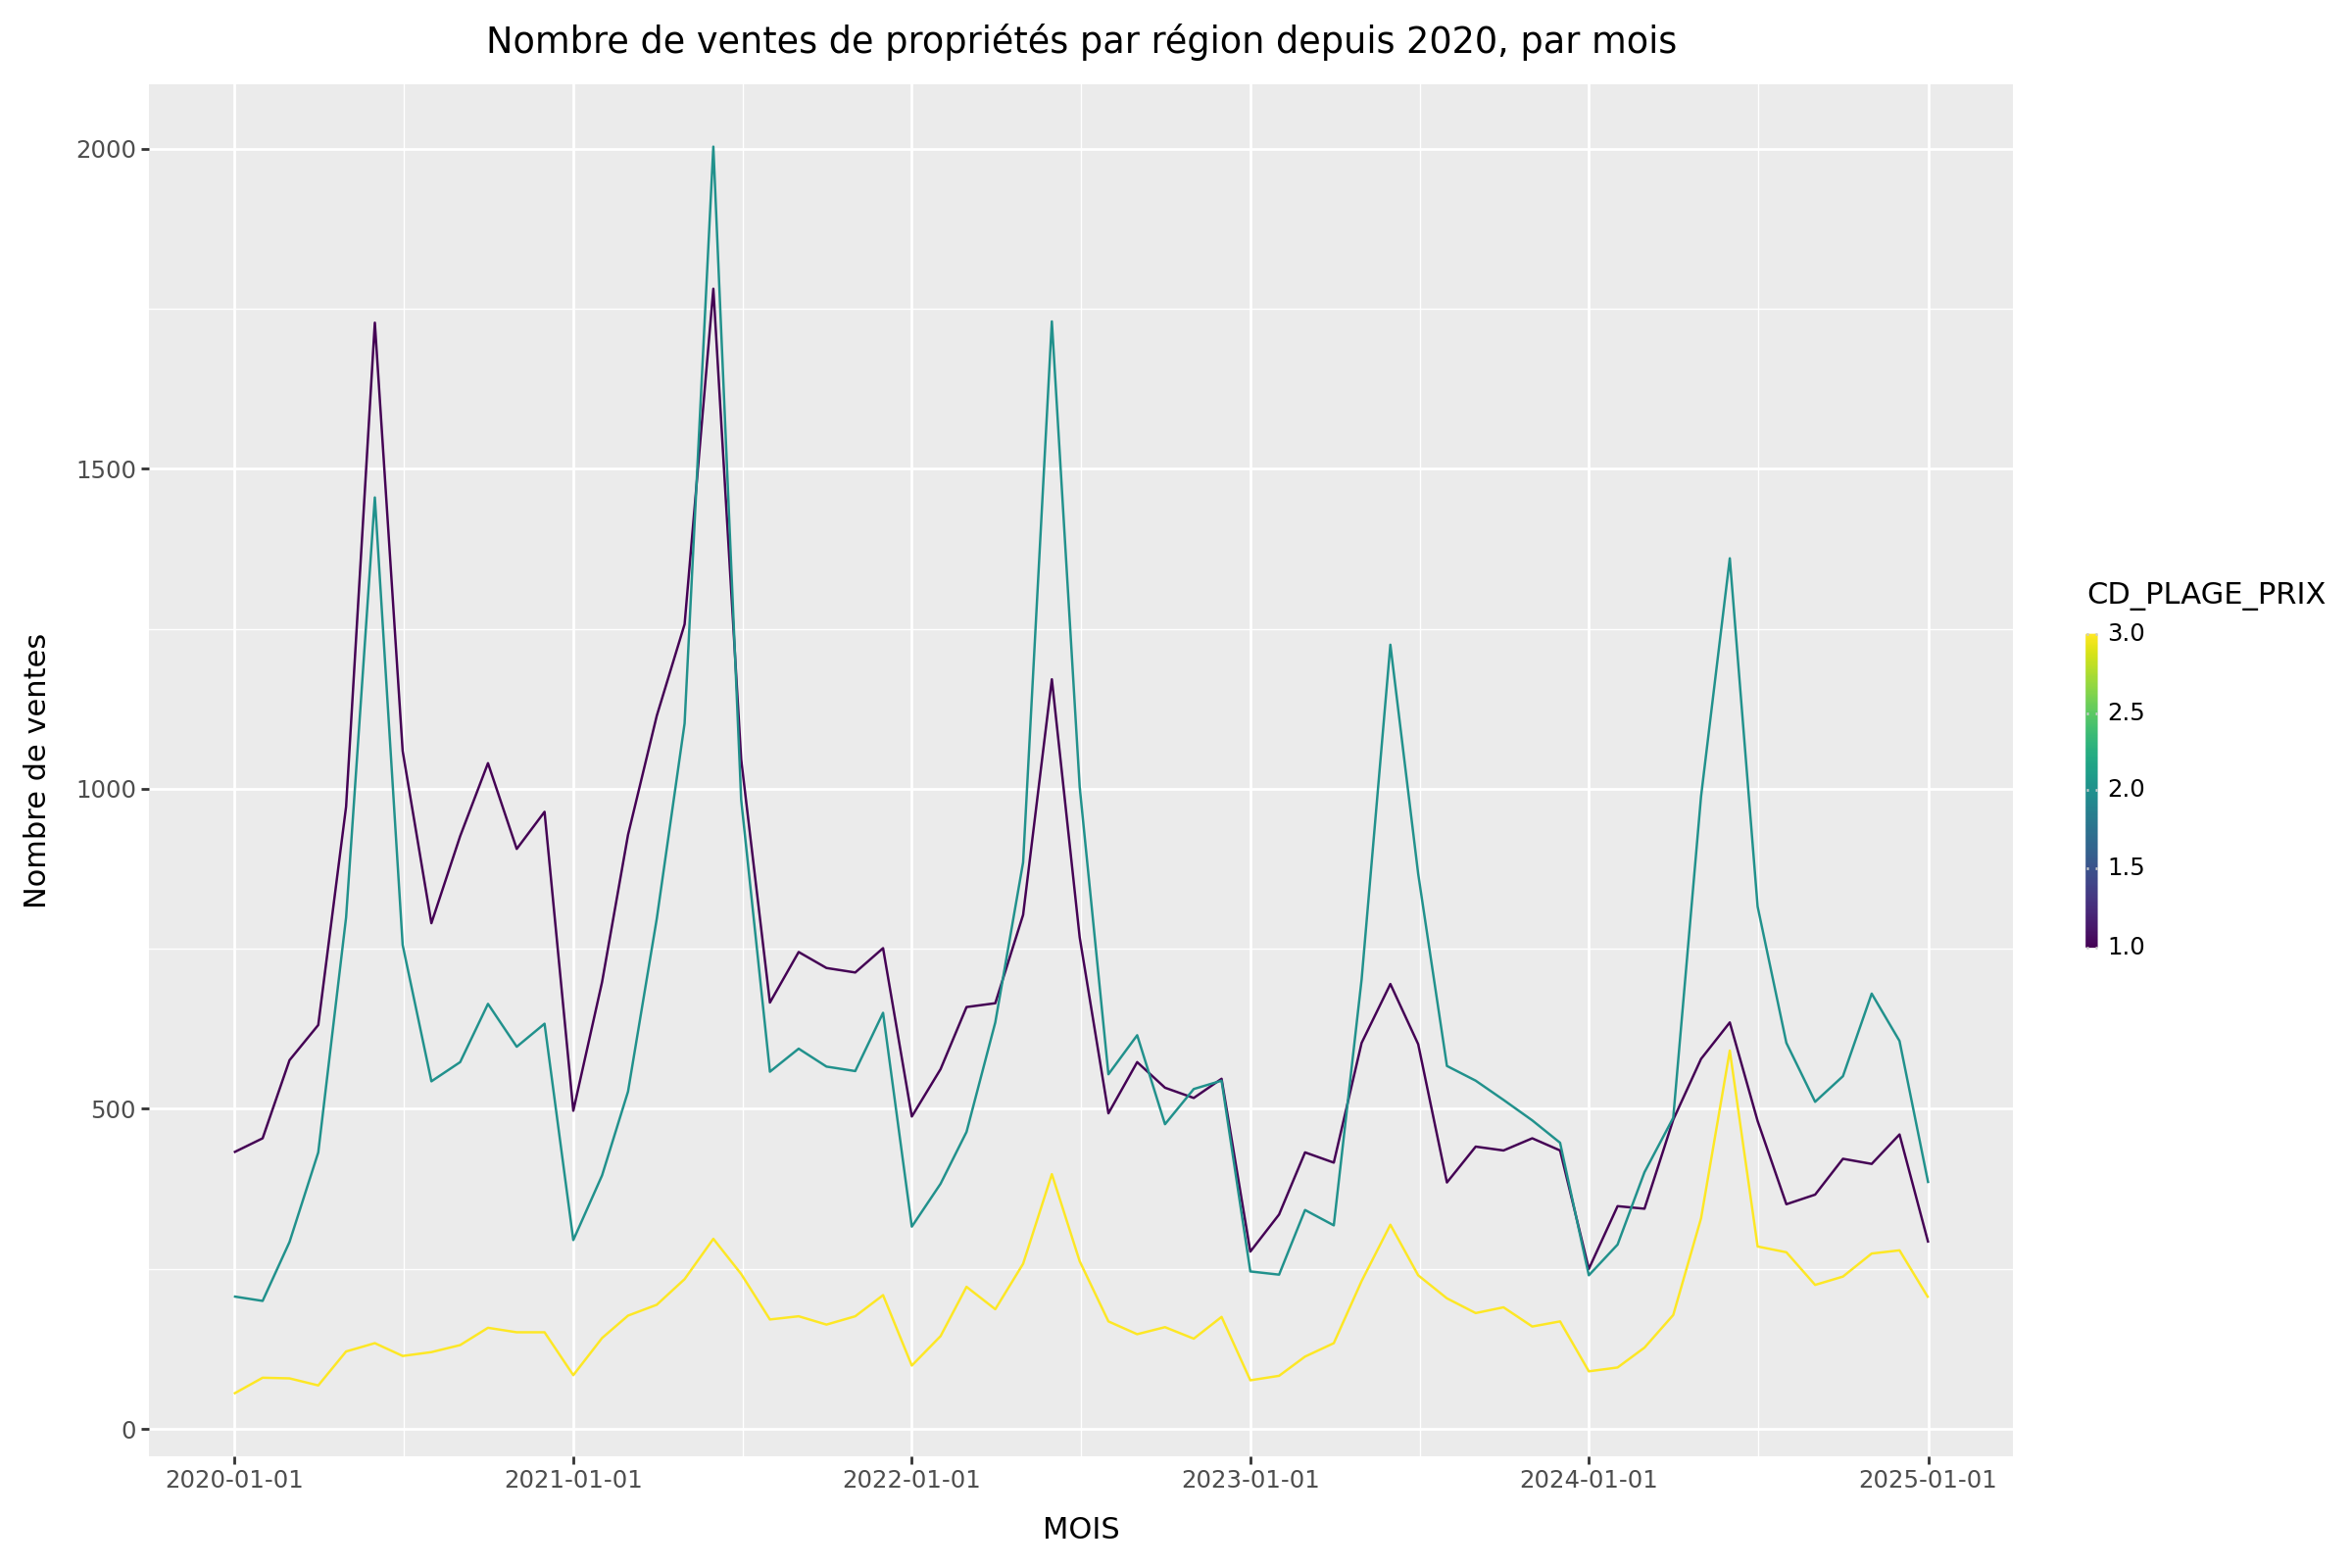

In [ ]:
# Visualisation

graphique = (
    ggplot(data=data_prix_vente_regions) + geom_histogram(aes(x="NB_REQST")) + facet_grid(rows="CD_PLAGE_PRIX")
)
graphique_temps = (
    ggplot(data=data_prix_vente_regions[data_prix_vente_regions["ID_REGN_ADMIN"] == 3]) 
    + geom_line(aes(x="DT_DEBUT_MOIS", y="NB_REQST", group=" NOM_REGN_ADMIN", color=" NOM_REGN_ADMIN")) 
    + facet_grid(rows="CD_PLAGE_PRIX")
    + guides(shape=guide_legend(position=(0, 0), direction="vertical"))
    + theme(figure_size=(12,8), legend_direction="vertical", legend_position="right", legend_box="vertical", legend_key_width=4)
    + scale_x_datetime(date_breaks="1 years")
    + labs(x="MOIS", y="Nombre de ventes", title="Nombre de ventes de propriétés par région depuis 2020, par mois")
)
graphique_temps = (
    ggplot(data=data_prix_vente_regions[data_prix_vente_regions["ID_REGN_ADMIN"] == 3]) 
    + geom_line(aes(x="DT_DEBUT_MOIS", y="NB_REQST", group="CD_PLAGE_PRIX", color="CD_PLAGE_PRIX")) 
    + guides(shape=guide_legend(position=(0, 0), direction="vertical"))
    + theme(figure_size=(12,8), legend_direction="vertical", legend_position="right", legend_box="vertical", legend_key_width=4)
    + scale_x_datetime(date_breaks="1 years")
    + labs(x="MOIS", y="Nombre de ventes", title="Nombre de ventes de propriétés par région et plage de prix depuis 2020, par mois")
)
graphique_temps.show()

## Ventes totales dans le temps

    DT_DEBUT_MOIS  ID_REGN_ADMIN           NOM_REGN_ADMIN  NB_REQST_total
0      2020-01-01              1      "Bas-Saint-Laurent"             212
1      2020-01-01              2   "Saguenay-Lac-St-Jean"             290
2      2020-01-01              3     "Capitale-Nationale"             694
3      2020-01-01              4               "Mauricie"             385
4      2020-01-01              5                 "Estrie"             424
..            ...            ...                      ...             ...
971    2025-01-01             13                  "Laval"             304
972    2025-01-01             14             "Lanaudière"             725
973    2025-01-01             15            "Laurentides"            1119
974    2025-01-01             16             "Montérégie"            1871
975    2025-01-01             17       "Centre-du-Québec"             312

[976 rows x 4 columns]


c:\Users\koolc\OneDrive\Documents\Quebec-Explorer-registre-foncier\.venv\Lib\site-packages\mizani\breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


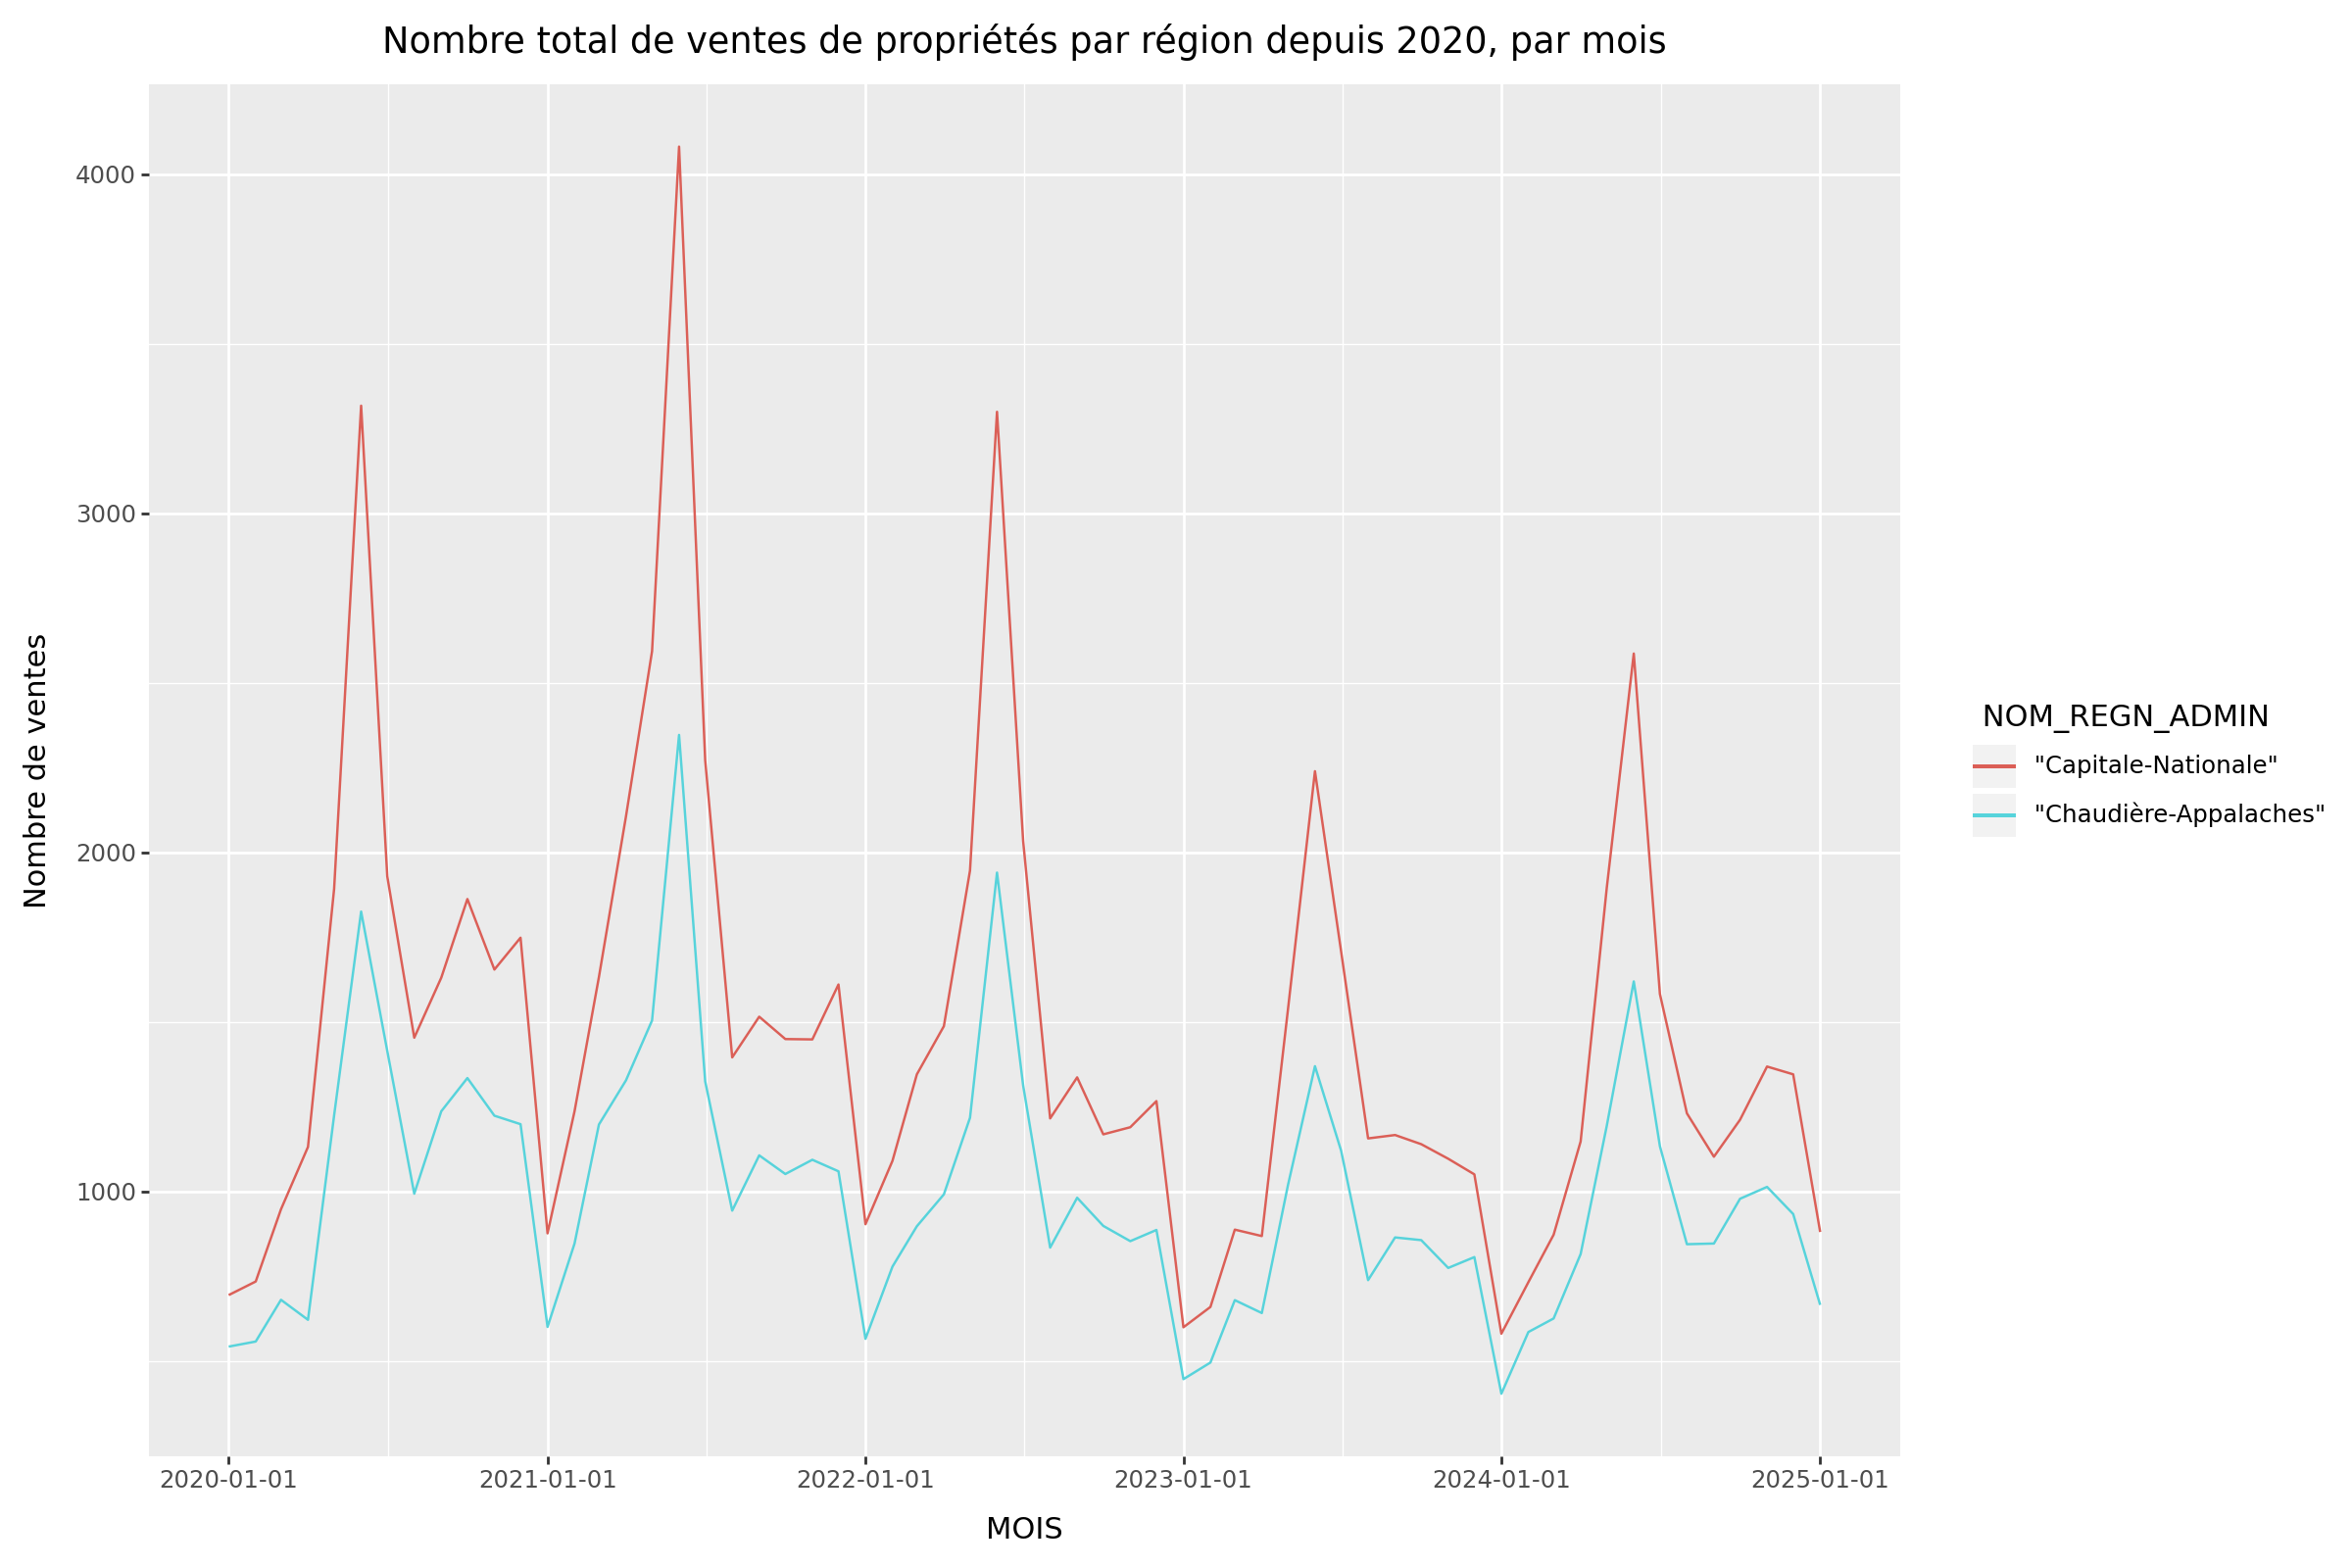

In [31]:
data_prix_vente_regions_total = data_prix_vente_regions.groupby(by=["DT_DEBUT_MOIS","ID_REGN_ADMIN", " NOM_REGN_ADMIN"]).NB_REQST.agg(NB_REQST_total="sum").reset_index()
print(str(data_prix_vente_regions_total))

graphique_total_temps = (
    ggplot(data=data_prix_vente_regions_total[data_prix_vente_regions_total["ID_REGN_ADMIN"].isin([3,12])]) 
    + geom_line(aes(x="DT_DEBUT_MOIS", y="NB_REQST_total", color=" NOM_REGN_ADMIN")) 
    + theme(figure_size=(12,8))
    + scale_x_datetime(date_breaks="1 years")
    + labs(x="MOIS", y="Nombre de ventes", title="Nombre total de ventes de propriétés par région depuis 2020, par mois")
)
graphique_total_temps.show()

## Proportions de ventes par plage de prix versus le nombre total

  DT_DEBUT_MOIS  ID_REGN_ADMIN  CD_PLAGE_PRIX  CD_NATR_ACTE_JURDQ  NB_REQST  \
0    2020-01-01              1              1                   1       191   
1    2020-01-01              1              2                   1        14   
2    2020-01-01              1              3                   1         7   
3    2020-01-01              2              1                   1       241   
4    2020-01-01              2              2                   1        44   

            NOM_REGN_ADMIN  NB_REQST_total  
0      "Bas-Saint-Laurent"             212  
1      "Bas-Saint-Laurent"             212  
2      "Bas-Saint-Laurent"             212  
3   "Saguenay-Lac-St-Jean"             290  
4   "Saguenay-Lac-St-Jean"             290  


c:\Users\koolc\OneDrive\Documents\Quebec-Explorer-registre-foncier\.venv\Lib\site-packages\mizani\breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


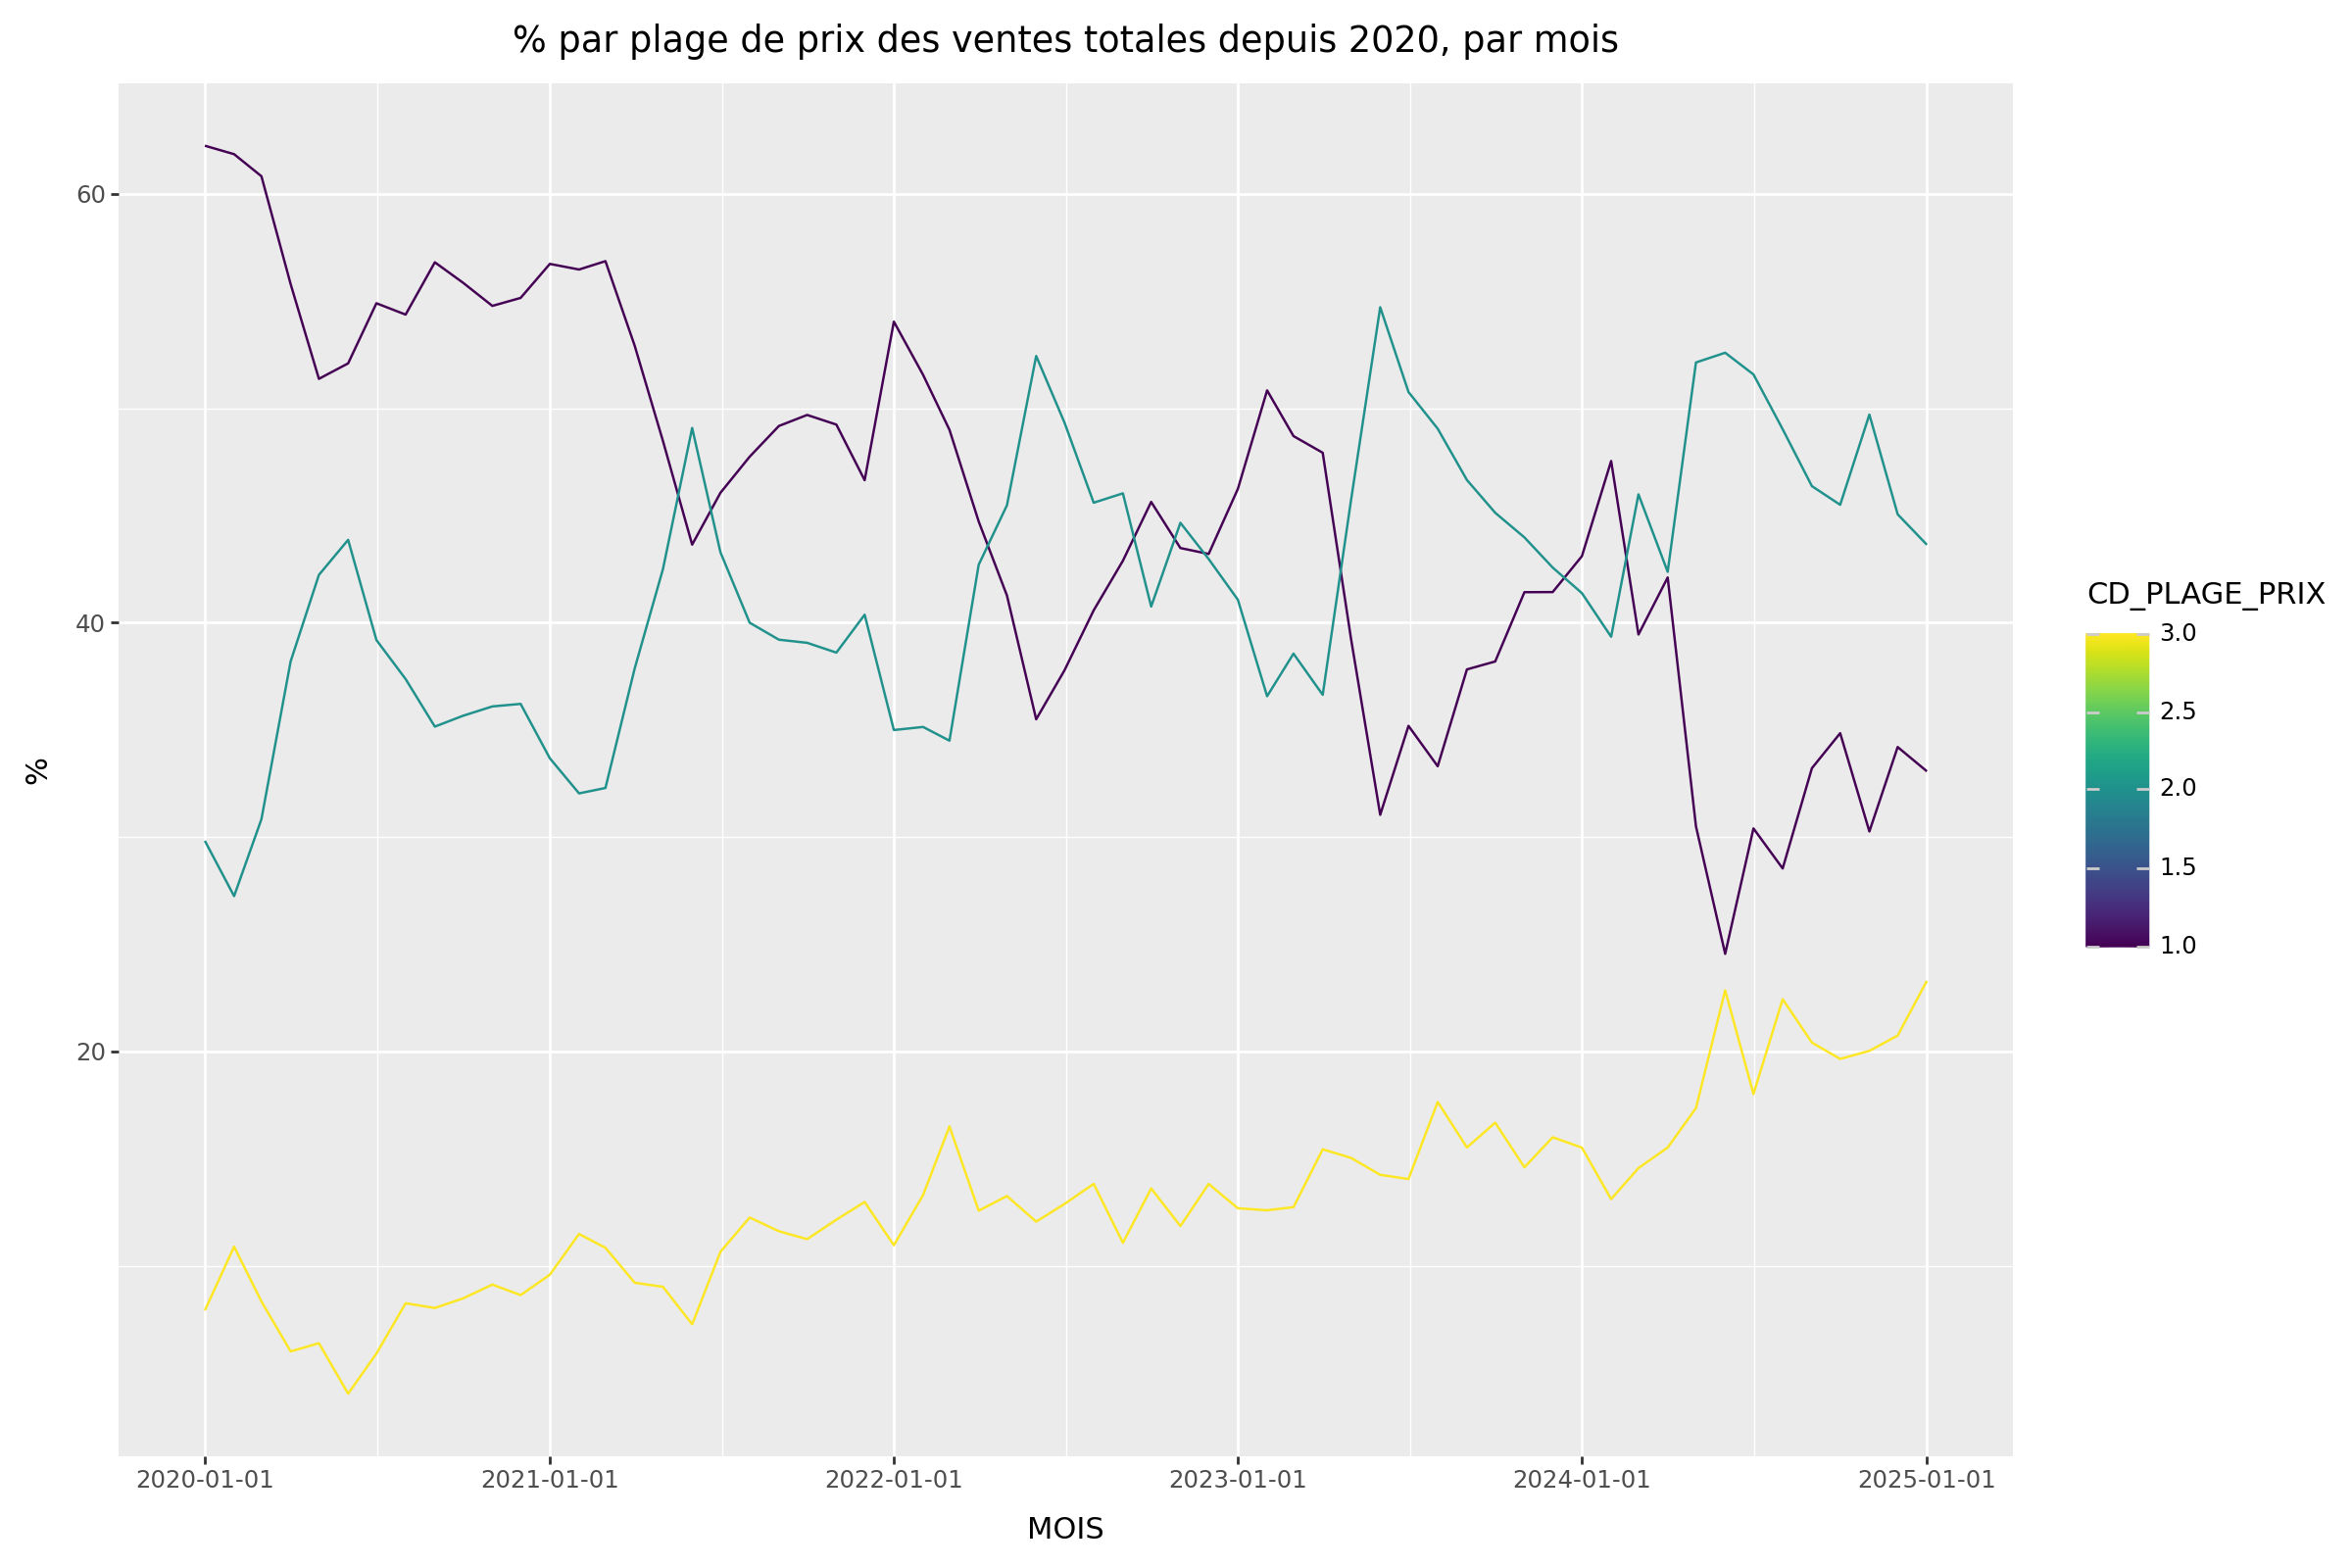

In [39]:
data_prix_vente_regions_avec_total = data_prix_vente_regions.merge(right=data_prix_vente_regions_total,
                                                                   on = ["DT_DEBUT_MOIS", "ID_REGN_ADMIN", " NOM_REGN_ADMIN"])
print(data_prix_vente_regions_avec_total.head())
data_prix_vente_regions_avec_total["NB_REQST_pct"] = data_prix_vente_regions_avec_total["NB_REQST"]/data_prix_vente_regions_avec_total["NB_REQST_total"]*100

graphique_pct_plage_temps = (
    ggplot(data=data_prix_vente_regions_avec_total[data_prix_vente_regions_avec_total["ID_REGN_ADMIN"].isin([3])]) 
    #+ facet_grid(rows=" NOM_REGN_ADMIN")
    + geom_line(aes(x="DT_DEBUT_MOIS", y="NB_REQST_pct", color="CD_PLAGE_PRIX", group="CD_PLAGE_PRIX")) 
    + theme(figure_size=(12,8))
    + scale_x_datetime(date_breaks="1 years")
    + labs(x="MOIS", y="%", title="% par plage de prix des ventes totales depuis 2020, par mois")
)
graphique_pct_plage_temps.show()